# Challenege - Telecom X: Análisis y Predicción de Churn de Clientes - Miguel Acuña

# **0. CARGA DE DATOS**

## **0.1 LIBRERIAS**

In [1]:
#Importando la biblioteca Pandas
import pandas as pd

#Importando el módulo JSON
import json

# Import requests to fetch data from URL
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Librerias para el preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## **0.2 DATASET**

In [2]:
# DIRECCION:
path = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Fetch the data from the URL
response = requests.get(path)
data = json.loads(response.text)

# Normalize the JSON data
df_normalized = pd.json_normalize(data)

# Display the first few rows of the normalized DataFrame
display(df_normalized.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **1. DESCRIPCION DEL PROYECTO**

## **1.1 DESCRIPCION DEL PROBLEMA**

Telecom X, una empresa de telecomunicaciones, está experimentando una alta tasa de cancelación de clientes (churn). Esta pérdida de clientes representa un desafío significativo para la rentabilidad y el crecimiento de la empresa. Actualmente, no se comprenden claramente los factores subyacentes que impulsan a los clientes a abandonar los servicios. La falta de esta comprensión impide a la empresa desarrollar estrategias de retención efectivas y proactivas, lo que resulta en una continua erosión de su base de clientes.

## **1.2 Objetivo Principal del Proyecto:**

Identificar y reducir a los clientes con alta probabilidad de abandonar el servicio, permitiendo así intervenciones proactivas.


## **1.3 Objetivo de Ciencia de Datos:**

Este es un problema de clasificación binaria.

Nuestro objetivo principal es predecir si un cliente "dejará" o "no dejará" la empresa. La variable Churn tiene dos categorías posibles (sí/no, 1/0), lo que la convierte en una tarea de clasificación binaria. La meta final es construir un modelo que clasifique a los clientes en estas dos categorías. Para ello se utlizara:

* Realizar un tratamiento ETL sobre el dataset.
* Realizar una exploracion descriptiva de los datos.

# **2. ANALISIS EXPLORATORIO DE LOS DATOS**

## **2.1 DESCRIPCION DEL DATASET**

Los datos para este proyecto de análisis de churn de clientes en Telecom X se obtendrán a través de una API (Interfaz de Programación de Aplicaciones). Esta API proporciona acceso estructurado a la información de los clientes, incluyendo detalles demográficos, servicios contratados, historial de pagos y, crucialmente, el estado de churn de cada cliente.

## **2.2 Variable Objetivo y Variables de Entrada**

**Variable Objetivo:**

Churn: Indica si un cliente ha cancelado su servicio (Yes/No). Esta es la variable que queremos predecir o explicar.

**Variables de Entrada:**

Estas son las variables que utilizaremos para entender y, eventualmente, predecir el churn.

Incluyen:

* customerID: Identificador único del cliente (útil para seguimiento, pero no como predictor directo).
* gender: Género del cliente.
* SeniorCitizen: Si el cliente es un ciudadano de la tercera edad.
* Partner: Si el cliente tiene pareja.
* Dependents: Si el cliente tiene dependientes.
* tenure: Meses de contrato del cliente.
* PhoneService: Si tiene servicio telefónico.
* MultipleLines: Si tiene múltiples líneas telefónicas.
* InternetService: Tipo de servicio de internet.
* OnlineSecurity: Si tiene seguridad en línea.
* OnlineBackup: Si tiene respaldo en línea.
* DeviceProtection: Si tiene protección de dispositivo.
* TechSupport: Si tiene soporte técnico.
* StreamingTV: Si tiene servicio de streaming de TV.
* StreamingMovies: Si tiene servicio de streaming de películas.
* Contract: Tipo de contrato.
* PaperlessBilling: Si tiene facturación sin papel.
* PaymentMethod: Método de pago.
* Charges.Monthly: Cargos mensuales.
* Charges.Total: Cargos totales.

## **2.3 CARACTERIZACION DEL DATASET**

El dataset cuenta con un total de 7267 registros y posee 21 columnas.

In [3]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
df_normalized.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


### **2.3.1 Clasificacion de las columnas segun su natureleza**

Se categoriazan las columnas en una lista de acuerdo a su natureleza.


La columna customerID es de tipo object es un variable tipo entero.

La columna customer.SeniorCitizen se muestra que es de tipo entero y esta columna es de tipo object. Es un columna de tipo categorica.

La columna account.Charges.Total se observa que es de tipo de object pero un es un variable tipo float ya que representa el costo total de un cliente.

In [5]:
columns_integer = ['customerID', 'customer.tenure', ]
columns_categoricas = ['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                       'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                       'account.Contract', 'account.PaymentMethod' ]

Columns_binarias = ['Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling' ]
columns_float = ['account.Charges.Monthly', 'account.Charges.Total']

print(len(columns_integer)+len(columns_categoricas)+len(Columns_binarias)+len(columns_float))

21


### 2.3.2 Distribucion de variables categoricas

**Distribucion de variables con mas de un solo elementos unicos**

In [6]:
# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)*100

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

In [7]:
# Ver el conteo y la proporción de Class
# columnas_categorias = df.select_dtypes(include='object').columns.tolist()
# print(columnas_categorias)
for i in columns_categoricas:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CUSTOMER.GENDER
                 Freq[N]  Prop[%]
customer.gender                  
Male                3675   50.571
Female              3592   49.429
***********************
        PHONE.MULTIPLELINES
                     Freq[N]  Prop[%]
phone.MultipleLines                  
No                      3495   48.094
Yes                     3065   42.177
No phone service         707    9.729
***********************
        INTERNET.INTERNETSERVICE
                          Freq[N]  Prop[%]
internet.InternetService                  
Fiber optic                  3198   44.007
DSL                          2488   34.237
No                           1581   21.756
***********************
        INTERNET.ONLINESECURITY
                         Freq[N]  Prop[%]
internet.OnlineSecurity                  
No                          3608   49.649
Yes                         2078   28.595
No internet service         1581   21.756
***********************
        INTERNET.ONLINEBACKUP
      

**Variables Nominales (Sin orden inherente):**

* CUSTOMER.GENDER:

  Male, Female.

  Hay un equilibrio en el generos. Esto sugiere que el género, por sí solo, podría no ser un factor diferenciador principal en el churn, pero es importante considerarlo en combinación con otras variables.

* PHONE.MULTIPLELINES:

  No, Yes, No phone service.

  La mayoría de los clientes tienen una sola línea (No con 48.1%) o múltiples líneas (Yes con 42.2%). Un 9.7% de los clientes no tiene servicio telefónico.

**Servicios de internet y sevicios adicionales:**

* INTERNET.INTERNETSERVICE: Fiber optic, DSL, No.

  La fibra óptica es el servicio de internet más popular (44%), seguido por DSL (34.2%). Un 21.8% de los clientes no tiene servicio de internet
  

* INTERNET.ONLINESECURITY: No, Yes, No internet service.

* INTERNET.ONLINEBACKUP: No, Yes, No internet service.

* INTERNET.DEVICEPROTECTION: No, Yes, No internet service.

* INTERNET.TECHSUPPORT: No, Yes, No internet service.

* INTERNET.STREAMINGTV: No, Yes, No internet service.

* INTERNET.STREAMINGMOVIES: No, Yes, No internet service.

* ACCOUNT.PAYMENTMETHOD: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic). No hay un orden natural entre los métodos de pago.

* ACCOUNT.CONTRACT:

  La gran mayoría de los clientes (55.1%) tiene contratos mes a mes, lo que implica una menor lealtad y un mayor riesgo de 'churn'. Los contratos de dos años (24%) y un año (20.9%) son menos comunes. Esta es una variable crítica para el análisis de churn, ya que los contratos a corto plazo suelen estar asociados con tasas de cancelación más altas.

El 21.8% de los clientes no tiene servicio de internet, y esta categoría se repite consistentemente en todos los servicios adicionales de internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies).

Esto es crucial: aproximadamente una quinta parte de la base de clientes no usa internet, **lo que significa que las variables relacionadas con servicios de internet adicionales serán "No internet service" para ellos.**

Servicios Adicionales (Seguridad, Respaldo, Protección, Soporte, Streaming):

Para los clientes que sí tienen internet, la tendencia general es que más clientes no tienen estos servicios adicionales que los que sí los tienen (ej. OnlineSecurity: 49.6% No vs 28.6% Yes). Esto podría indicar una oportunidad para la empresa o, alternativamente, que estos servicios no son percibidos como esenciales por la mayoría. La categoría "No internet service" es una constante en todas estas variables, lo que simplifica su manejo al agrupar a los clientes sin internet.

**Distribucion de variable con dos elementos unicos**

In [8]:
for i in Columns_binarias:
    print(' '*7,i.upper())
    print(dist(df_normalized,i))
    print("*"*23)

        CHURN
       Freq[N]  Prop[%]
Churn                  
No        5174   71.199
Yes       1869   25.719
           224    3.082
***********************
        CUSTOMER.SENIORCITIZEN
                        Freq[N]  Prop[%]
customer.SeniorCitizen                  
0                          6085   83.735
1                          1182   16.265
***********************
        CUSTOMER.PARTNER
                  Freq[N]  Prop[%]
customer.Partner                  
No                   3749   51.589
Yes                  3518   48.411
***********************
        CUSTOMER.DEPENDENTS
                     Freq[N]  Prop[%]
customer.Dependents                  
No                      5086   69.988
Yes                     2181   30.012
***********************
        PHONE.PHONESERVICE
                    Freq[N]  Prop[%]
phone.PhoneService                  
Yes                    6560   90.271
No                      707    9.729
***********************
        ACCOUNT.PAPERLESSBILLIN

Descripcion:

* CHURN (Variable Objetivo):

  Observamos un desequilibrio de clases significativo: la mayoría de los clientes (más del 71%) no han hecho churn, mientras que solo un 25.7% sí lo ha hecho. 224 registros (3.08%) sin una categoría clara. Se debe de revisar la calidad de estos datos.


* CUSTOMER.SENIORCITIZEN:

  La gran mayoría de los clientes de Telecom X no son ciudadanos de la tercera edad. Solo un 16.3% de la base de clientes entra en esta categoría.

  *Verificar impacto sobre CHURN*

* CUSTOMER.PARTNER

  La distribución entre clientes con y sin pareja es casi equitativa.

  *Verificar impacto sobre CHURN*

* CUSTOMER.DEPENDENTS

  La mayoría de los clientes no tienen dependientes (70%). Solo un 30% sí los tiene.

  *Verificar impacto sobre CHURN*

* PHONE.PHONESERVICE

  La mayoría de los clientes (más del 90%) tiene servicio telefónico. Esto es esperable en una empresa de telecomunicaciones. El grupo sin servicio telefónico es minoritario, pero su comportamiento de churn podría ser distinto.

* ACCOUNT.PAPERLESSBILLING

  La facturación en linea es la opción preferida por la mayoría de los clientes (casi el 60%).
  
  *Verificar impacto sobre CHURN*



#### **2.3.2.1 Eliminacion de valores null en la variable objetivo**

Se observa que espacios vacios en la variable este valor representa solo el 3% del total de los datos.

In [9]:
# Eliminar filas donde la columna 'Churn' es una cadena vacía
df_cleaned = df_normalized[df_normalized['Churn'] != ''].copy()

# Verificar el número de instancias en el DataFrame limpio
print(f"Número de instancias antes de eliminar: {len(df_normalized)}")
print(f"Número de instancias después de eliminar: {len(df_cleaned)}")

# Mostrar el conteo de valores para la columna 'Churn' en el DataFrame limpio
print("\nConteo de valores para 'Churn' después de eliminar valores vacíos:")
display(df_cleaned['Churn'].value_counts())

Número de instancias antes de eliminar: 7267
Número de instancias después de eliminar: 7043

Conteo de valores para 'Churn' después de eliminar valores vacíos:


,count
Churn,
No,5174
Yes,1869


Se realiza un transformacion para poder interpretar mas facilmente los graficos

In [10]:
df_cleaned['customer.SeniorCitizen'] = df_cleaned['customer.SeniorCitizen'].map({0: 'No', 1: 'Yes'})

#### **2.3.2.2 Graficos de distribucion de las columnas categoricas sobre Churn**

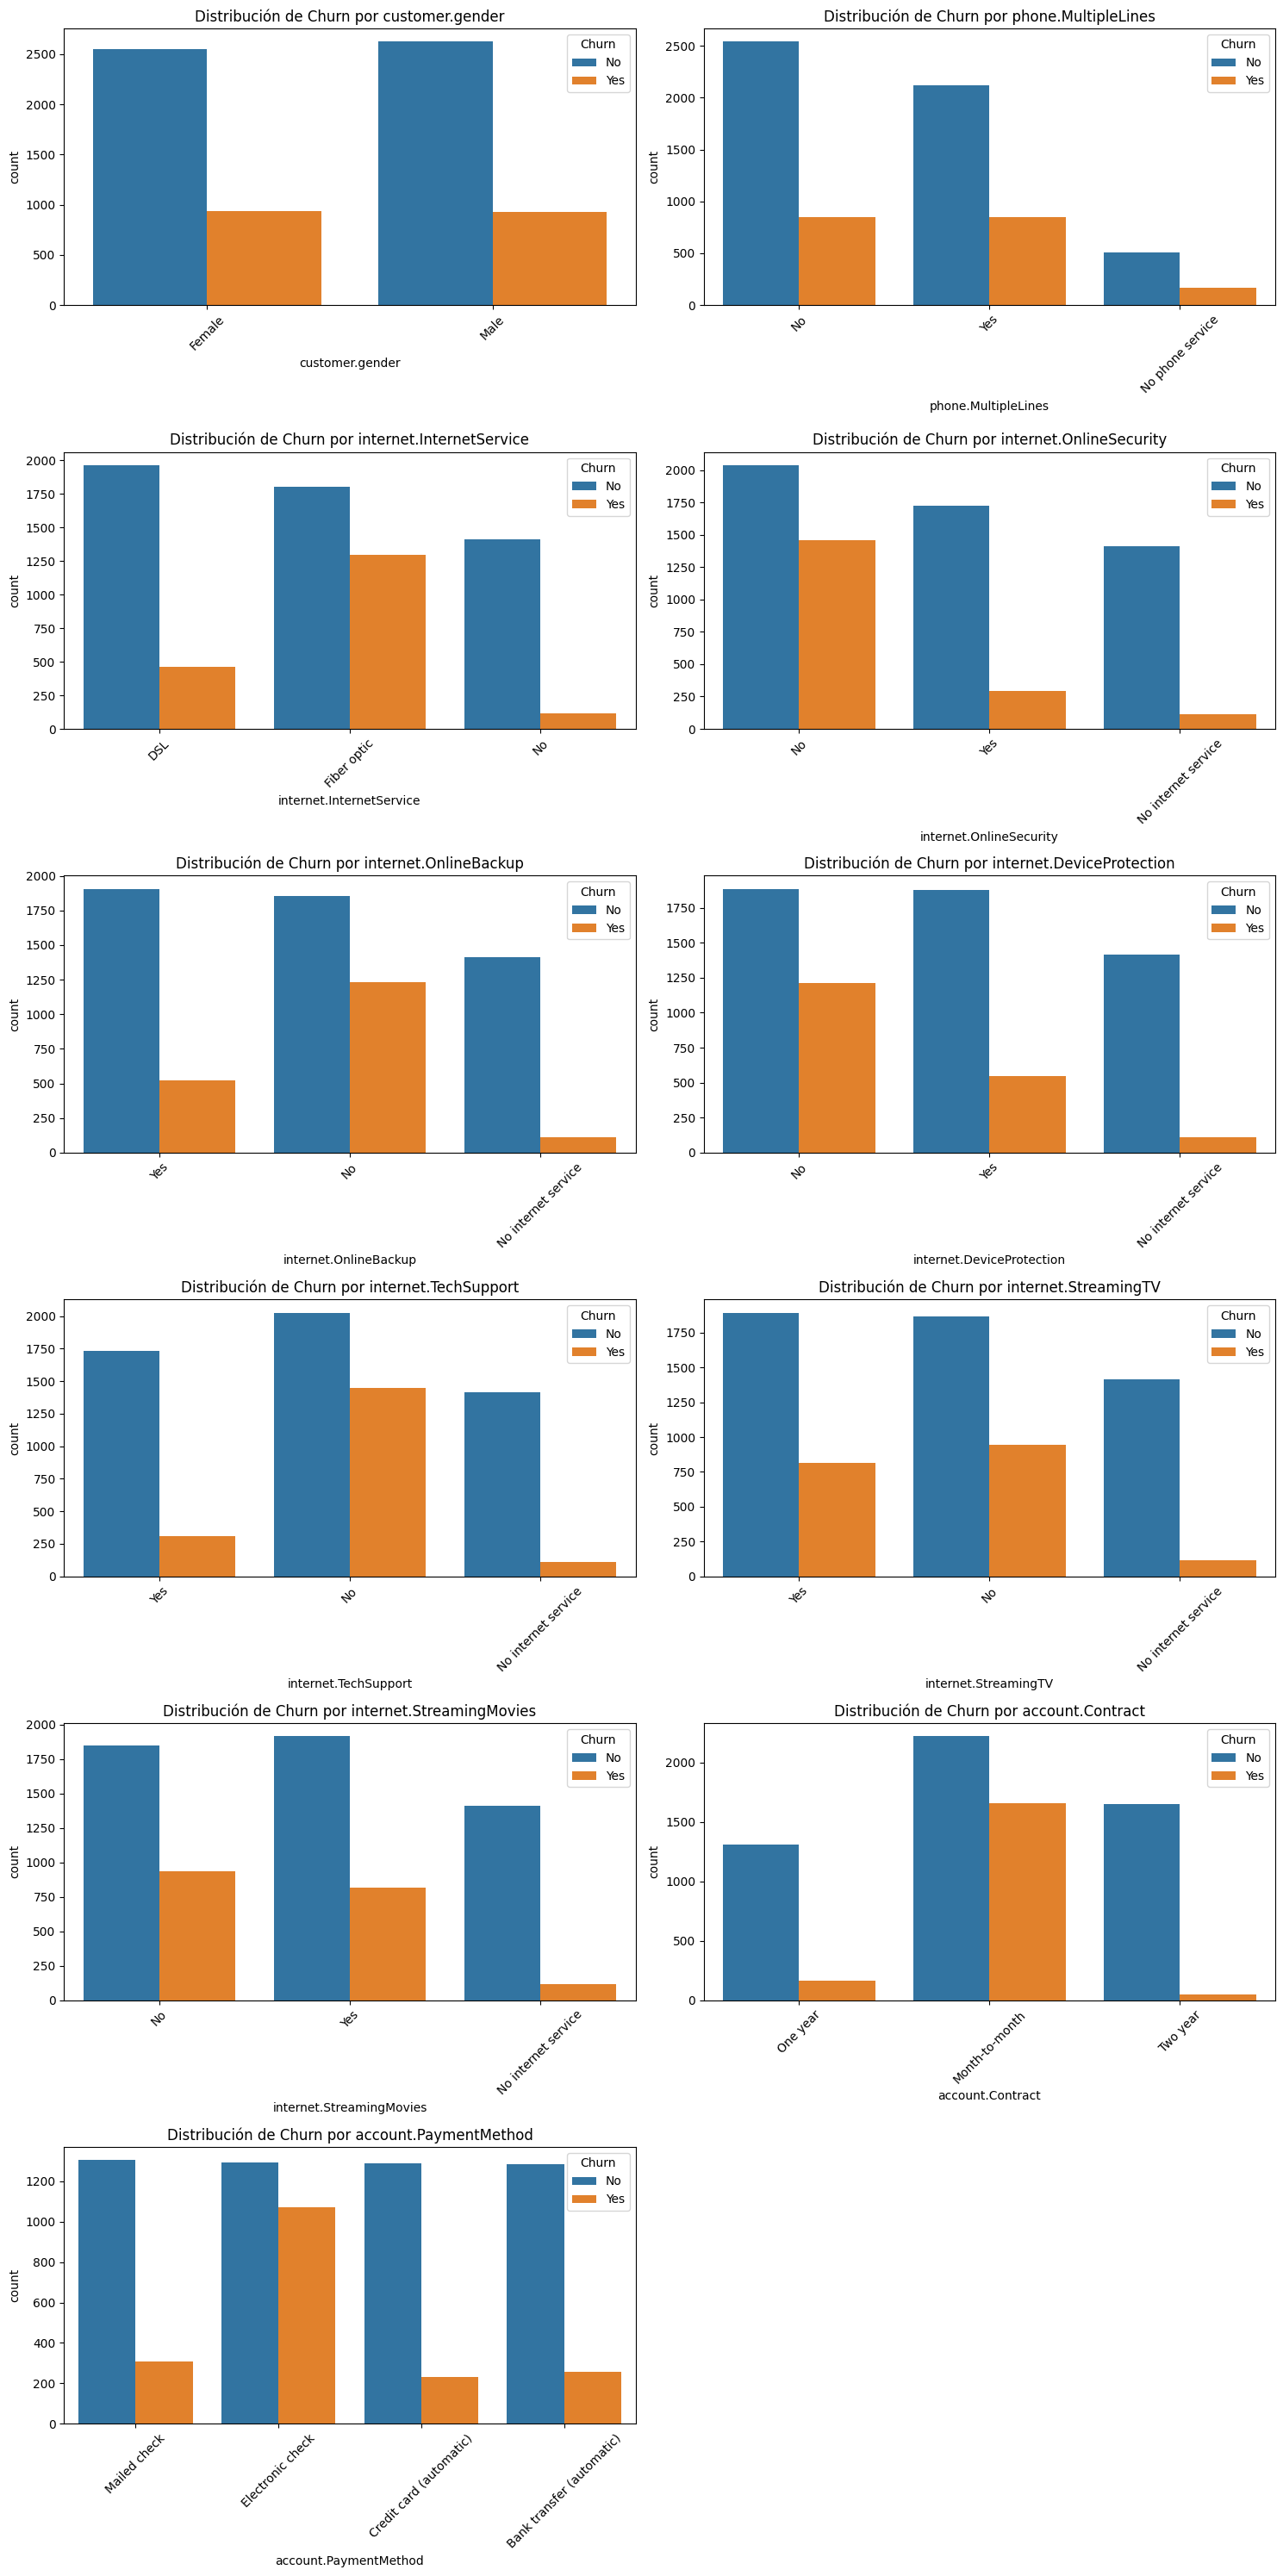

In [11]:
# Se obtiene el listado de variables categóricas (excluyendo 'Churn')
categorical_columns = [col for col in columns_categoricas if col != 'Churn']

# Determinar el número de filas y columnas para la cuadrícula de subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar el array 2D de ejes para facilitar la iteración

# Crear un countplot para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_cleaned, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Distribución de Churn por {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotar las etiquetas del eje x para mejor legibilidad

# Ocultar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Inferencias:

* customer.gender:
  
  El género no parece tener un impacto significativo en la tasa de churn, ya que las proporciones de clientes que se van ('Yes') y se quedan ('No') son muy similares entre hombres y mujeres.

* phone.MultipleLines:

  Las proporciones entre los clientes con múltiples líneas telefónicas ('Yes') y los que no tienen múltiples líneas ('No') muestran proprocion similar en la tase de churn. Los que no tienen servicio telefónico ('No phone service') tienen una tasa de churn baja.

* internet.InternetService:

  Los clientes con servicio de 'Fiber optic' presentan una tasa de churn notablemente mayor que aquellos con servicio 'DSL'. Los clientes sin servicio de internet ('No') tienen una tasa de churn muy baja, lo cual es esperable ya que no están utilizando un servicio propenso a la cancelación.

* internet.OnlineSecurity, internet.OnlineBackup, internet.
DeviceProtection, internet.TechSupport:

  Para todos estos servicios adicionales de internet, los clientes que NO tienen el servicio ('No') muestran una tasa de churn significativamente más alta que aquellos que sí lo tienen ('Yes'). Esto sugiere que ofrecer y utilizar estos servicios adicionales puede ser un factor importante en la retención de clientes. Los clientes sin servicio de internet ('No internet service') tienen, como se mencionó antes, una baja tasa de churn.

* internet.StreamingTV, internet.StreamingMovies:
  
  Similar a los servicios adicionales anteriores, los clientes que NO tienen servicios de streaming ('No') tienden a tener una tasa de churn más alta que aquellos que sí los tienen ('Yes').

* account.Contract:

  El tipo de contrato es un predictor muy fuerte de churn. Los clientes con contratos 'Month-to-month' tienen una tasa de churn muchísimo más alta que aquellos con contratos de 'One year' o 'Two year'. Los contratos a largo plazo están claramente asociados con una mayor retención.

* account.PaymentMethod:
  
  El método de pago 'Electronic check' muestra una tasa de churn considerablemente más alta en comparación con otros métodos como 'Mailed check', 'Bank transfer (automatic)' y 'Credit card (automatic)'.

#### **2.3.2.3 Graficos de distribucion de las columnas categoricas binarias sobre Churn**

Inferencias:

* customer.gender:
  
  El género no parece tener un impacto significativo en la tasa de churn, ya que las proporciones de clientes que se van ('Yes') y se quedan ('No') son muy similares entre hombres y mujeres.

* phone.MultipleLines:

  Las proporciones entre los clientes con múltiples líneas telefónicas ('Yes') y los que no tienen múltiples líneas ('No') muestran proprocion similar en la tase de churn. Los que no tienen servicio telefónico ('No phone service') tienen una tasa de churn baja.

* internet.InternetService:

  Los clientes con servicio de 'Fiber optic' presentan una tasa de churn notablemente mayor que aquellos con servicio 'DSL'. Los clientes sin servicio de internet ('No') tienen una tasa de churn muy baja, lo cual es esperable ya que no están utilizando un servicio propenso a la cancelación.

* internet.OnlineSecurity, internet.OnlineBackup, internet.
DeviceProtection, internet.TechSupport:

  Para todos estos servicios adicionales de internet, los clientes que NO tienen el servicio ('No') muestran una tasa de churn significativamente más alta que aquellos que sí lo tienen ('Yes'). Esto sugiere que ofrecer y utilizar estos servicios adicionales puede ser un factor importante en la retención de clientes. Los clientes sin servicio de internet ('No internet service') tienen, como se mencionó antes, una baja tasa de churn.

* internet.StreamingTV, internet.StreamingMovies:
  
  Similar a los servicios adicionales anteriores, los clientes que NO tienen servicios de streaming ('No') tienden a tener una tasa de churn más alta que aquellos que sí los tienen ('Yes').

* account.Contract:

  El tipo de contrato es un predictor muy fuerte de churn. Los clientes con contratos 'Month-to-month' tienen una tasa de churn muchísimo más alta que aquellos con contratos de 'One year' o 'Two year'. Los contratos a largo plazo están claramente asociados con una mayor retención.

* account.PaymentMethod:
  
  El método de pago 'Electronic check' muestra una tasa de churn considerablemente más alta en comparación con otros métodos como 'Mailed check', 'Bank transfer (automatic)' y 'Credit card (automatic)'.

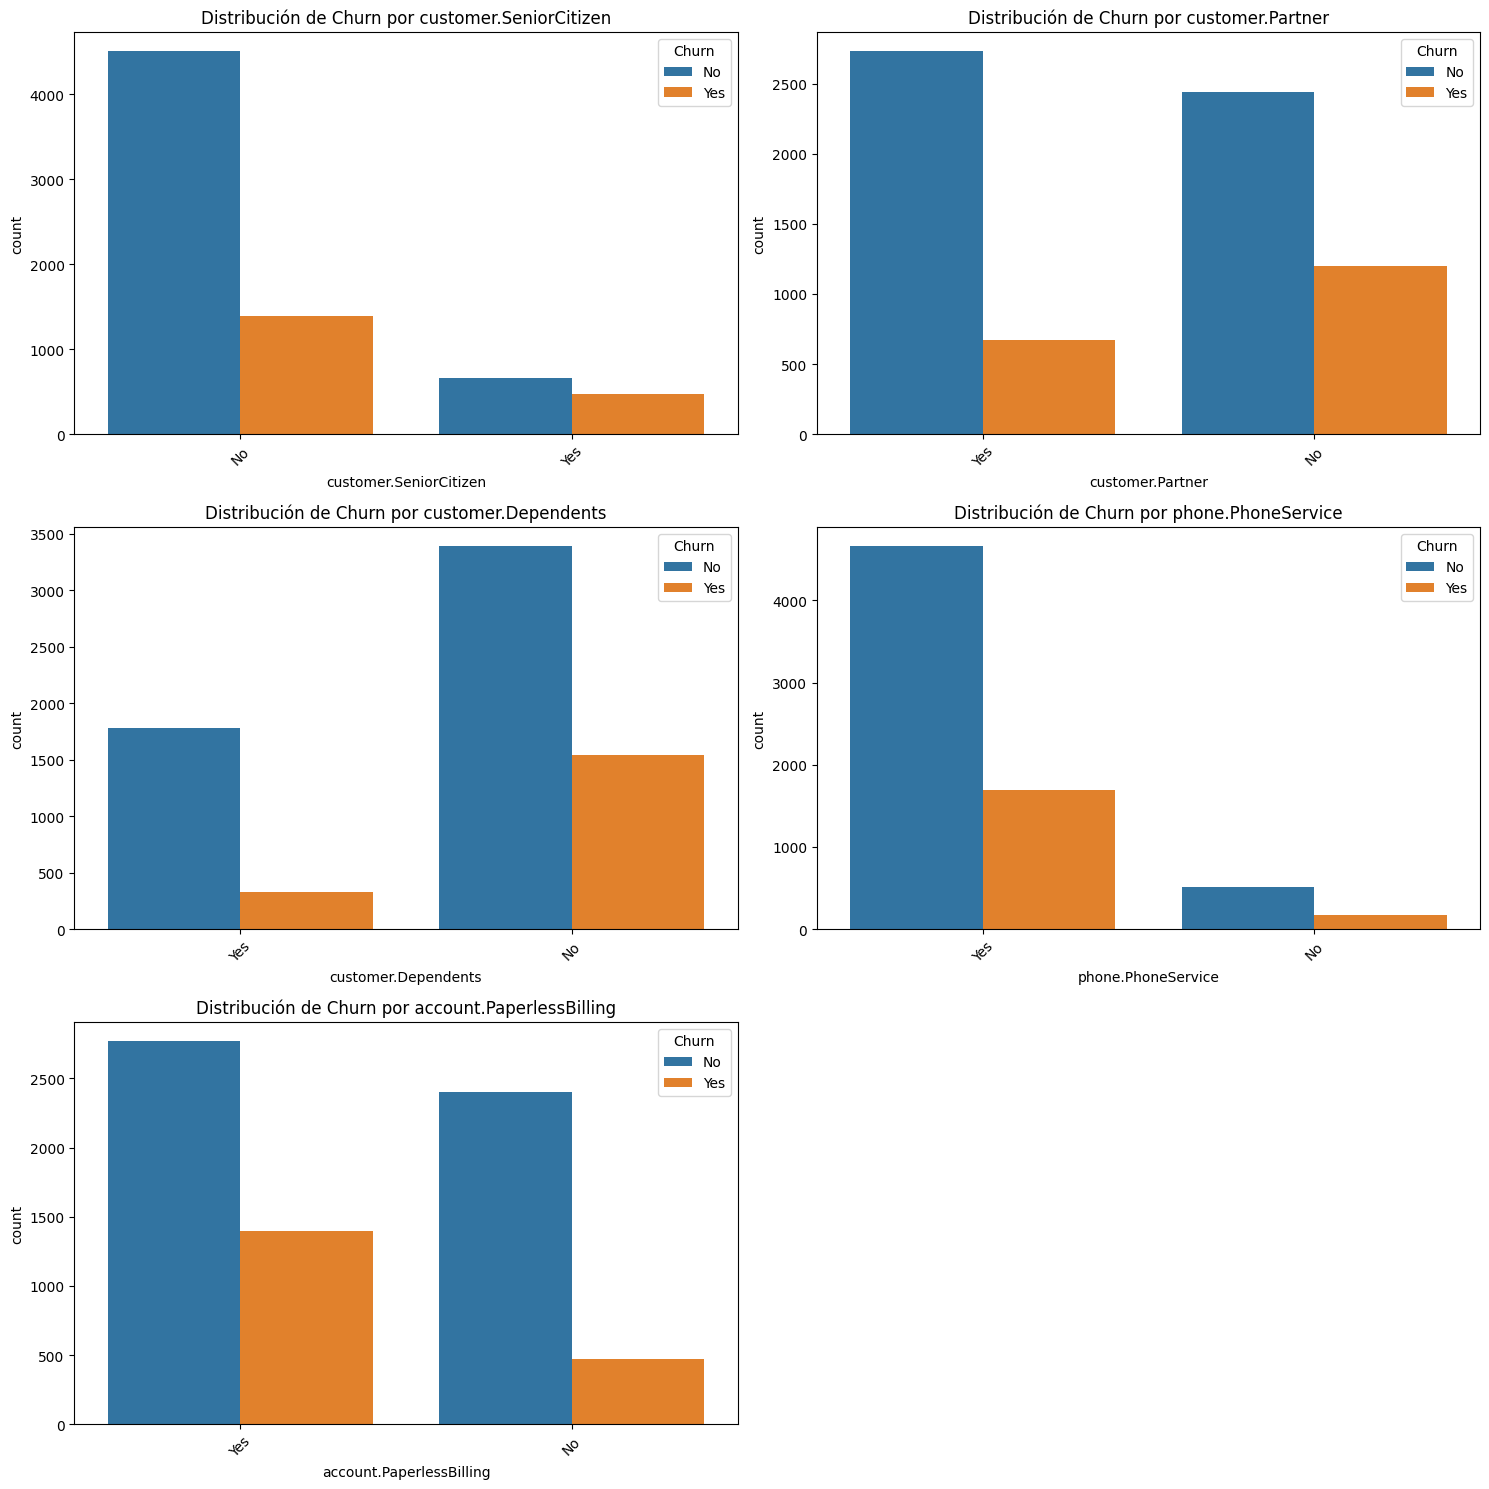

In [12]:
# Obtener la lista de columnas categóricas (excluyendo 'Churn')
categorical_columns = [col for col in Columns_binarias if col != 'Churn']

# Determinar el número de filas y columnas para la cuadrícula de subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar el array 2D de ejes para facilitar la iteración

# Crear un countplot para cada columna categórica
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_cleaned, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Distribución de Churn por {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotar las etiquetas del eje x para mejor legibilidad

# Ocultar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* customer.SeniorCitizen:

  Se observa que los cliente que no son de la tecera edad tiene presenta un mayor cantidad de Churn en comparacion de que si son de la tercera edad. No obstante, los clientes que son ciudadanos de la tercera edad ('Yes') que son una minoria tienen una tasa de churn notablemente más alta en comparación con los que no lo son ('No'). Esto sugiere que la edad avanzada podría ser un factor de riesgo para el churn.

* customer.Partner:

  Los clientes sin pareja ('No') muestran una tasa de churn más alta que aquellos con pareja ('Yes'). Tener pareja parece estar asociado con una mayor retención.

* customer.Dependents:

  Los clientes sin dependientes ('No') tienen una tasa de churn significativamente mayor que aquellos con dependientes ('Yes'). Tener dependientes parece estar relacionado con una menor probabilidad de churn.

* phone.PhoneService:
  
  Aunque la gran mayoría de los clientes tiene servicio telefónico ('Yes'), la cantidad de churn es mayor para aquellos que sí tienen el servicio en comparación con el pequeño grupo que no lo tiene ('No').

* account.PaperlessBilling:
  
  Los clientes que tienen facturación electronica ('Yes') presentan una tasa de churn considerablemente más alta que aquellos que no la tienen ('No'). Esto podría indicar que la facturación electronica está asociada con clientes más propensos a cancelar.

### **2.3.3 Distribucion de variables numericas**

Se observa que la columna 'account.Charges.Total' es de tipo object, se realiza cambio variable numerica.

#### 2.3.3.1 Tratamiento y eliminacion de variable costos

In [13]:
# Inspeccionar valores únicos en 'account.Charges.Total' para entender por qué es un objeto
print("Valores únicos en 'account.Charges.Total':")
print(df_cleaned['account.Charges.Total'].unique())

Valores únicos en 'account.Charges.Total':
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [14]:
# Convertir 'account.Charges.Total' a numérico, forzando errores
df_cleaned['account.Charges.Total'] = pd.to_numeric(df_cleaned['account.Charges.Total'], errors='coerce')

In [15]:
# Verificar si se introdujeron valores NaN por la coerción
nan_count = df_cleaned['account.Charges.Total'].isnull().sum()
print(f"\nNúmero de valores NaN en 'account.Charges.Total' después de la conversión: {nan_count}")


Número de valores NaN en 'account.Charges.Total' después de la conversión: 11


Dado que los valores nulos son 11 se pueden eliminar del dataset. Esta cantidad no representa más del 1%.

In [16]:
df_cleaned.dropna(subset=['account.Charges.Total'], inplace=True)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

#### **2.3.3.2 Graficos de distribucion de las columnas numericas sobre Churn**

**Histogramas**

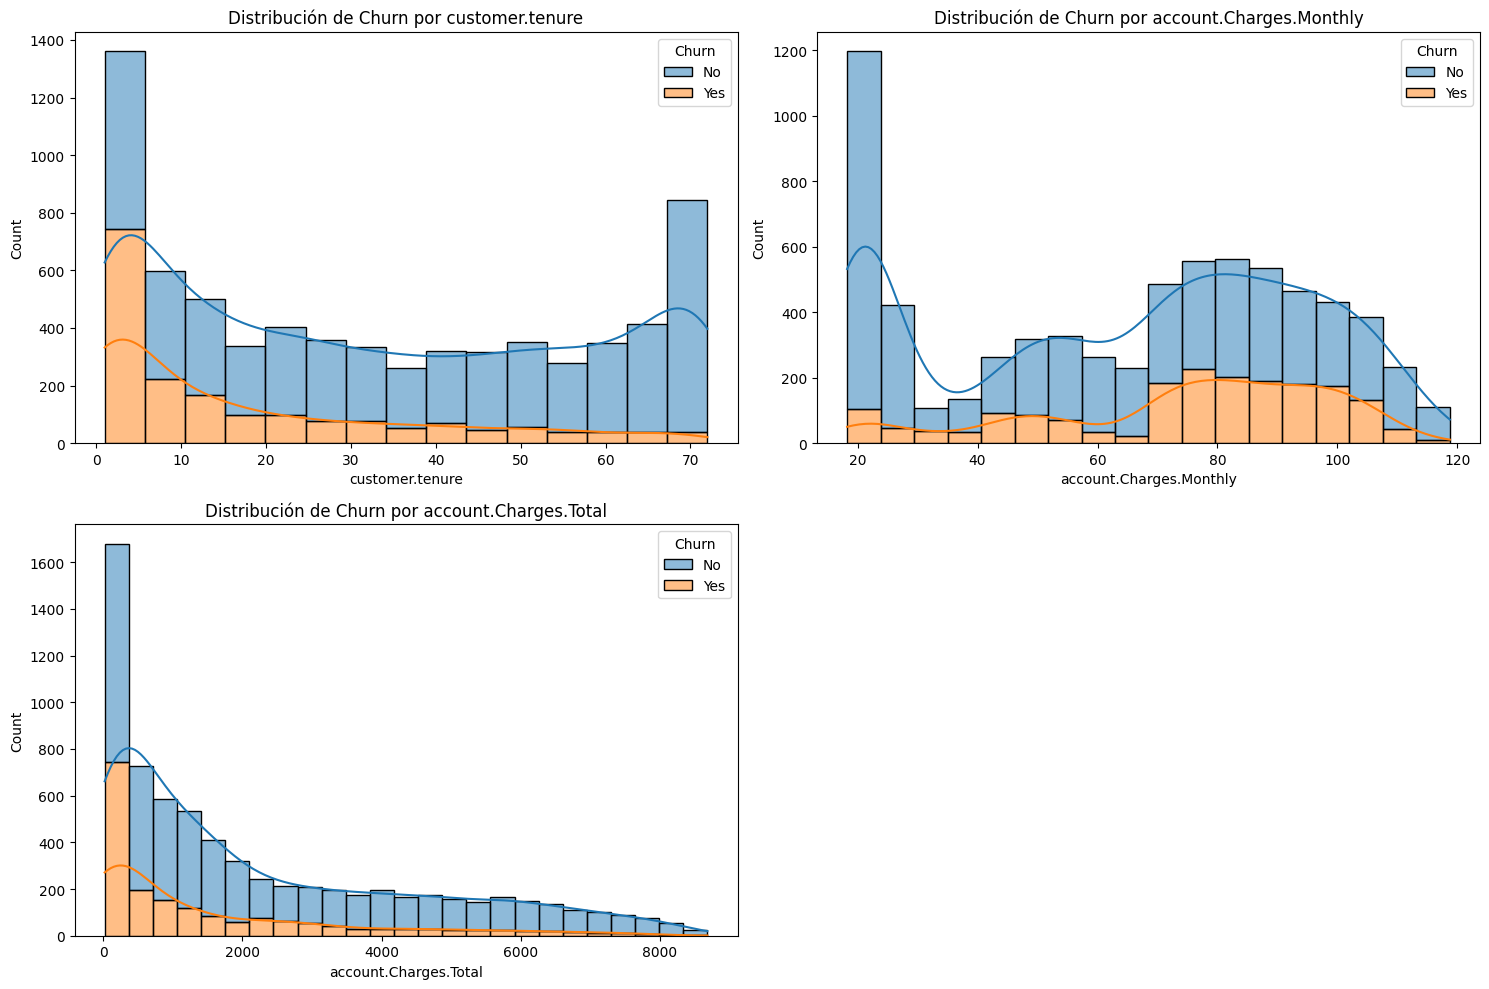

In [18]:
# Combinar columnas numéricas y remover 'customerID'
numerical_columns = [col for col in columns_integer + columns_float if col != 'customerID']

# Determinar el número de filas y columnas para la cuadrícula de subplots
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Aplanar el array 2D de ejes para facilitar la iteración

# Crear un histograma para cada columna numérica
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df_cleaned, x=col, hue='Churn', multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribución de Churn por {col}')

# Ocultar cualquier subplot no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Inferencias:

* customer.tenure:

  Se observa una clara tendencia: los clientes con menor antigüedad (tenure baja) tienen una tasa de churn significativamente más alta. A medida que la antigüedad del cliente aumenta, la proporción de churn disminuye drásticamente. Esto indica que los clientes de larga data son mucho menos propensos a cancelar su servicio.

* account.Charges.Monthly:

  Los clientes con cargos mensuales más altos ('account.Charges.Monthly') tienden a tener una mayor probabilidad de churn, especialmente en el rango de cargos más elevados. La distribución de los clientes que hacen churn está más concentrada en los valores de cargos mensuales más altos en comparación con los clientes que no hacen churn.

* account.Charges.Total:
  
  Los clientes con cargos totales más bajos ('account.Charges.Total') muestran una mayor proporción de churn. Esto está relacionado con la antigüedad (tenure), ya que los clientes con poca antigüedad tendrán cargos totales más bajos y, como vimos, son más propensos al churn. A medida que los cargos totales aumentan (lo que generalmente se correlaciona con una mayor antigüedad), la proporción de clientes que no hacen churn es mucho mayor.

**Boxplot**

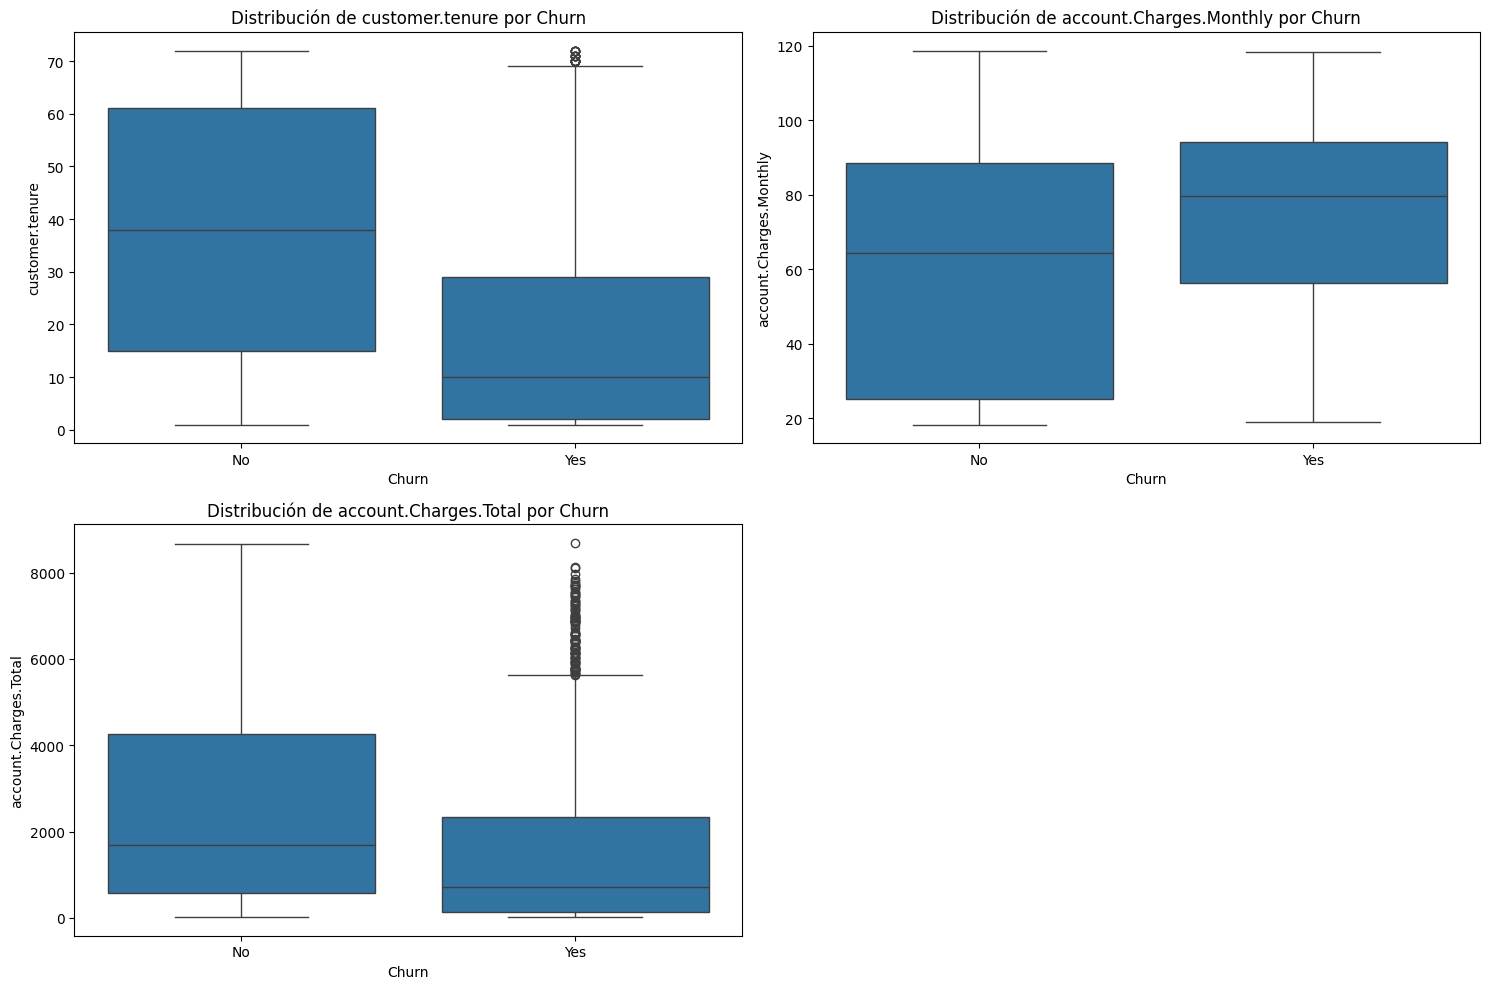

In [19]:
# Combine numerical columns and remove 'customerID'
numerical_columns = [col for col in columns_integer + columns_float if col != 'customerID']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df_cleaned, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Hide any subplot not used
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* customer.tenure:

  El gráfico de cajas para 'customer.tenure' muestra claramente que los clientes que no hicieron churn ('No') tienen una mediana de antigüedad significativamente más alta y una distribución que se extiende a valores mucho mayores de tenure en comparación con los clientes que sí hicieron churn ('Yes'). Los clientes que hicieron churn tienden a concentrarse en valores de tenure más bajos, con una mediana considerablemente menor. Esto refuerza la idea de que la antigüedad es un fuerte predictor de churn.
* account.Charges.Monthly:

  Para 'account.Charges.Monthly', el gráfico de cajas revela que los clientes que hicieron churn ('Yes') tienden a tener cargos mensuales más altos en promedio que los clientes que no hicieron churn ('No'). La mediana de los cargos mensuales es más alta para el grupo de churn, y la distribución se inclina hacia valores más altos.

* account.Charges.Total:
  
  El gráfico de cajas para 'account.Charges.Total' muestra que los clientes que no hicieron churn ('No') tienen una mediana y una distribución de cargos totales mucho más altas que los clientes que sí hicieron churn ('Yes'). Esto es coherente con el hallazgo de 'tenure', ya que los clientes con más antigüedad (y menos propensos al churn) habrán acumulado cargos totales mayores. Los clientes que hicieron churn tienen cargos totales mucho más bajos, lo cual es esperable dado que cancelaron su servicio antes.

#### **2.3.3.3 Grafico de correlacion entre variable numericas**

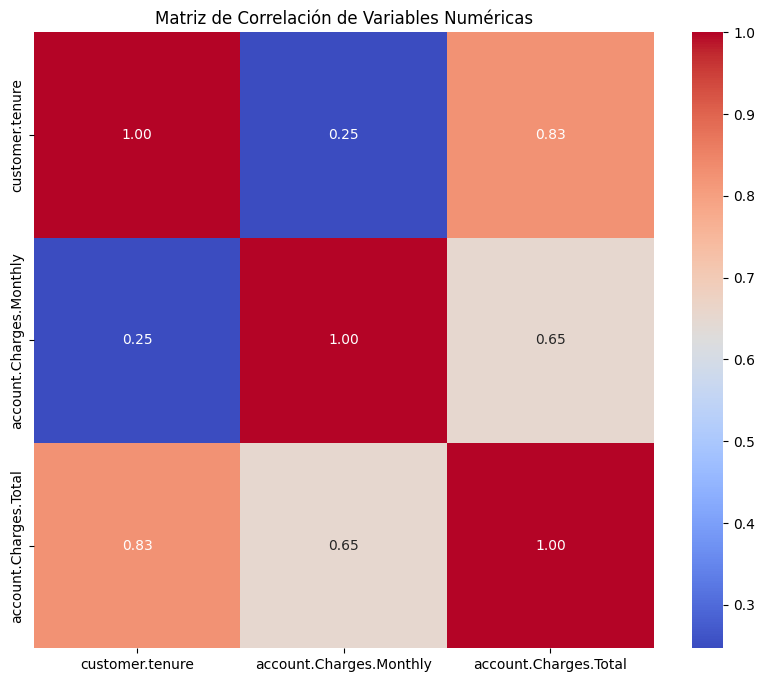

In [ ]:
# Calcular la matriz de correlación
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numerical_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

**Inferencias:**

* **customer.tenure y account.Charges.Total:** Se observa una correlación positiva fuerte (aproximadamente 0.83) entre la antigüedad del cliente (customer.tenure) y los cargos totales (account.Charges.Total). Esto es lógico, ya que los clientes que han estado más tiempo con la empresa habrán acumulado mayores cargos totales.

* **account.Charges.Monthly y account.Charges.Total:** Existe una correlación positiva moderada a fuerte (aproximadamente 0.65) entre los cargos mensuales (account.Charges.Monthly) y los cargos totales (account.Charges.Total). Esto también es esperable, ya que los cargos totales son la suma de los cargos mensuales a lo largo del tiempo.

* **customer.tenure y account.Charges.Monthly:** La correlación entre la antigüedad del cliente (customer.tenure) y los cargos mensuales (account.Charges.Monthly) es positiva pero más débil (aproximadamente 0.25). Esto sugiere que, si bien los clientes más antiguos pueden tener cargos mensuales ligeramente más altos en promedio, no es una relación tan directa como con los cargos totales.

Las variables numéricas customer.tenure y account.Charges.Total están fuertemente relacionadas entre sí, lo cual es una relación esperada. account.Charges.Monthly tiene una relación más moderada con ambas. Es importante tener en cuenta estas correlaciones entre account.Charges.Monthl y account.Charges.Total para evitar la multicolinealidad.

# **3. PREPROCESAMIENTO DEL DATASET**

## **3.1 Seleccion de caracteristicas**

Se elimina la columna 'custemerID' debido a que es numero consecutivo y no tiene influencia sobre la variable objetivo

In [20]:
df_cleaned.drop('customerID', axis=1, inplace=True)

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   object 
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

## **3.2 Division del dataset en caracteristicas y variable objetivo**

In [22]:
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer.gender            7032 non-null   object 
 1   customer.SeniorCitizen     7032 non-null   object 
 2   customer.Partner           7032 non-null   object 
 3   customer.Dependents        7032 non-null   object 
 4   customer.tenure            7032 non-null   int64  
 5   phone.PhoneService         7032 non-null   object 
 6   phone.MultipleLines        7032 non-null   object 
 7   internet.InternetService   7032 non-null   object 
 8   internet.OnlineSecurity    7032 non-null   object 
 9   internet.OnlineBackup      7032 non-null   object 
 10  internet.DeviceProtection  7032 non-null   object 
 11  internet.TechSupport       7032 non-null   object 
 12  internet.StreamingTV       7032 non-null   object 
 13  internet.StreamingMovies   7032 non-null   object 
 1

## **3.3 Transformacion de las caracteristicas**

In [24]:
# Seleciono las caracteristicas binarias
strict_binary_yes_no_cols = [
    'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'account.PaperlessBilling'
]
for col in strict_binary_yes_no_cols:
    if col in X.columns:
        X[col] = X[col].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

categorical_cols.remove('account.Contract')

print("Columnas numéricas:", numerical_cols)
print("Columnas categóricas:", categorical_cols)

X['account.Contract'] = X['account.Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Creo transforme para estandarizar variable numericas con StandrdScaler y Categoricas con OneHotEnocder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

Columnas numéricas: ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total']
Columnas categóricas: ['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaymentMethod']


## **3.4 División del dataset en datos de entrenamiento y datos de test**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42, stratify=y)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [26]:
X_train_processed.shape

(5484, 39)